In [31]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
path = "Results/energy_train_m/energy_ip_100_op_25_whole_in_test/energy/"
preds = np.load(path+'trans-mse-ar_pred_mu.npy')
inputs = np.load(path+'inputs.npy')
trues = np.load(path+'targets.npy')
#preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
#trues = trues.reshape(-1, preds.shape[-2], preds.shape[-1])
# [samples, pred_len, dimensions]
print(preds.shape, trues.shape, inputs.shape)

print("mse : ",mean_squared_error(trues.squeeze(),preds.squeeze()),"mae: ",mean_absolute_error(trues.squeeze(),preds.squeeze()))

(342, 25, 1) (342, 25, 1) (342, 100, 1)
mse :  9711.705 mae:  57.24437


In [34]:
# x = preds.reshape(54,13,-1,1)
# preds = x.mean(axis=1)
# preds.shape
# x = trues.reshape(54,13,-1,1)
# trues = x.mean(axis=1)
# trues.shape

# print("mse : ",mean_squared_error(trues.squeeze(),preds.squeeze()),"mae: ",mean_absolute_error(trues.squeeze(),preds.squeeze()))

<ipython-input-32-93bf618335c9>:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



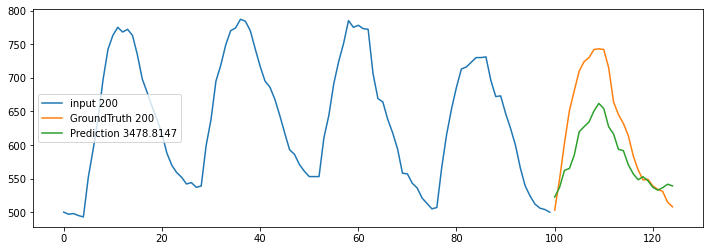

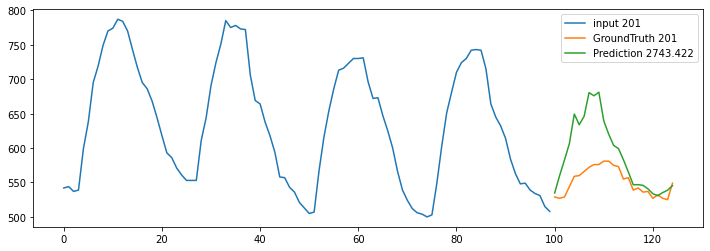

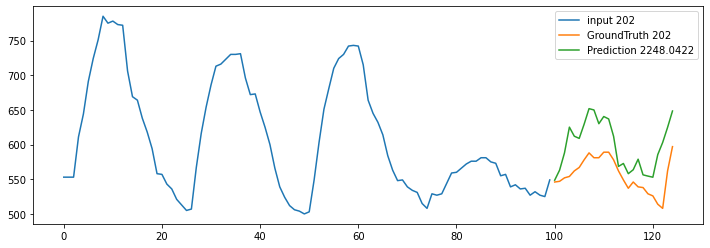

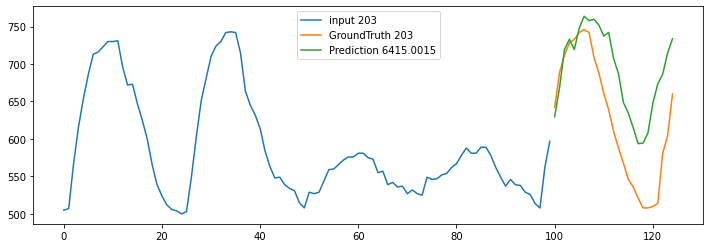

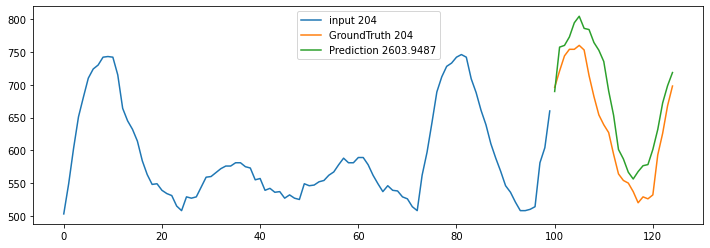

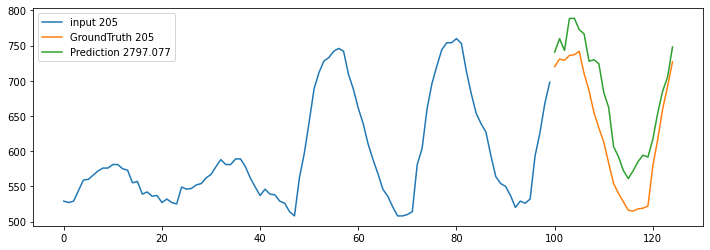

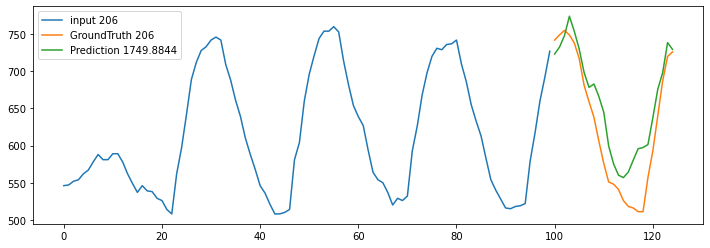

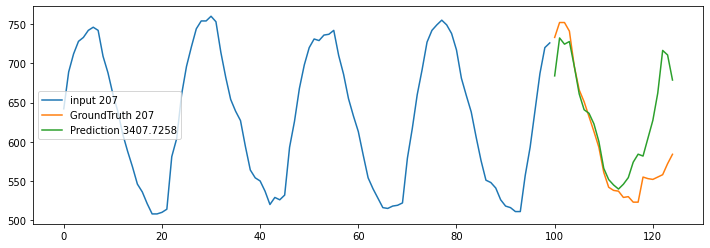

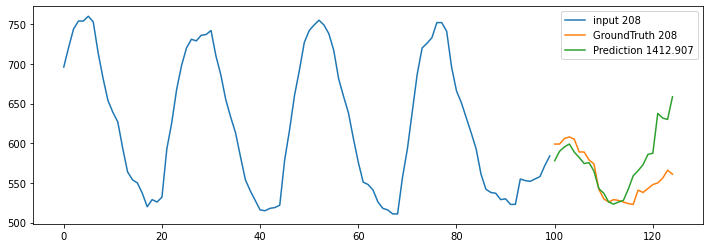

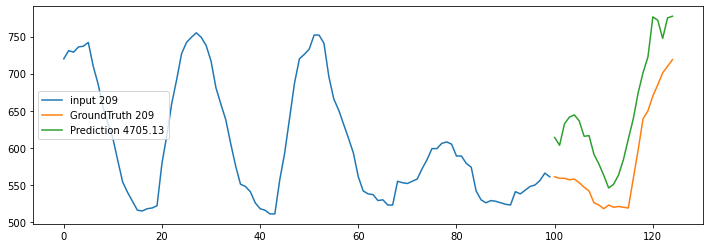

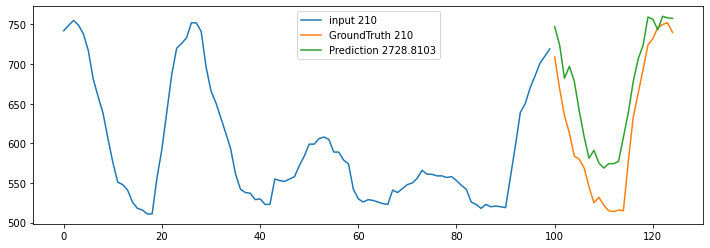

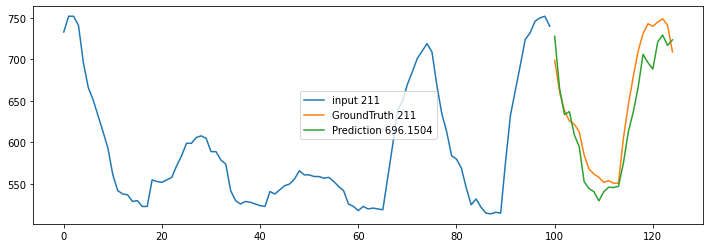

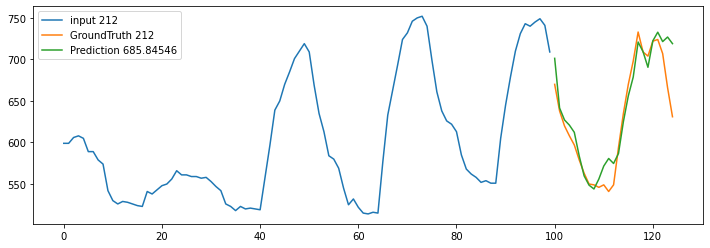

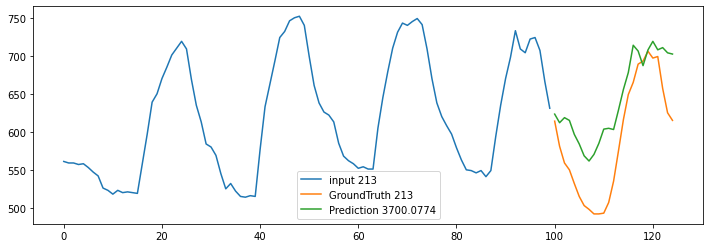

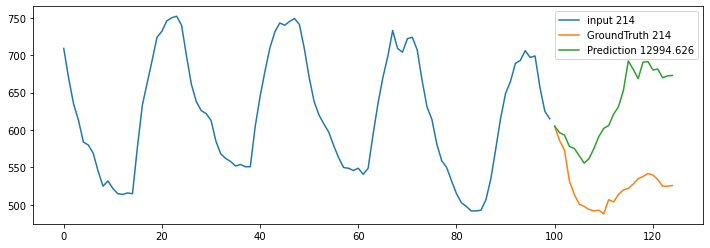

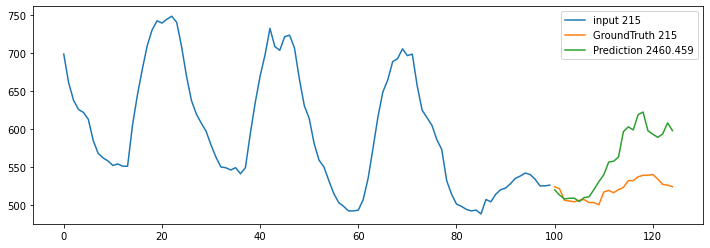

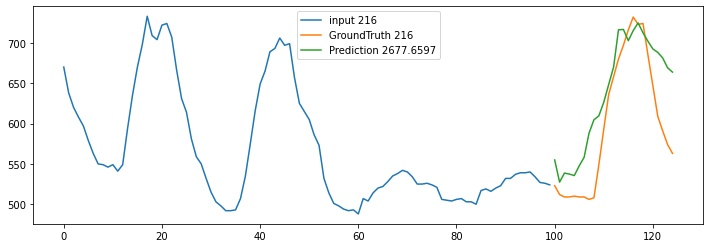

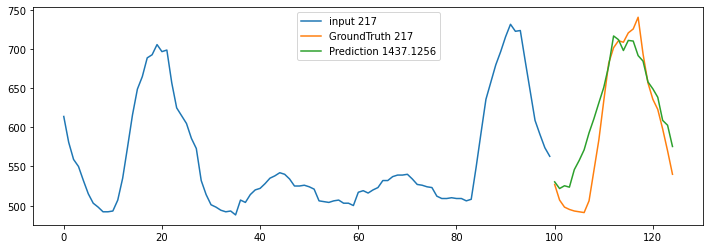

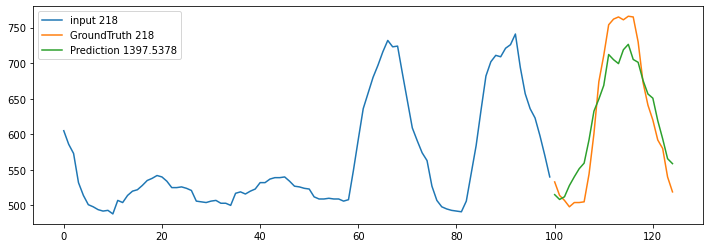

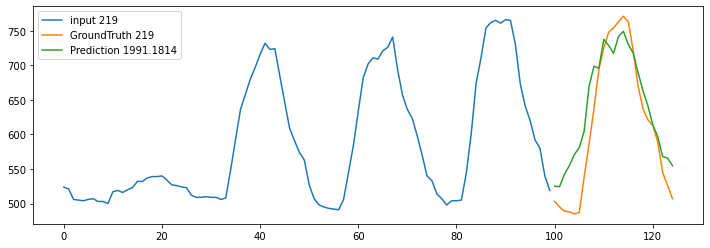

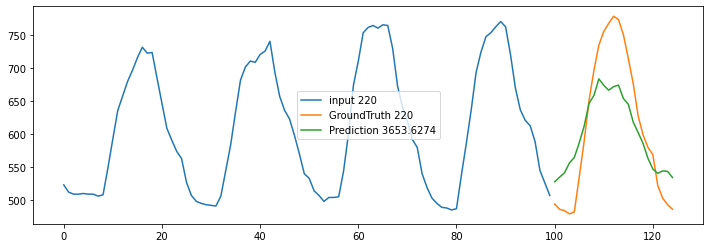

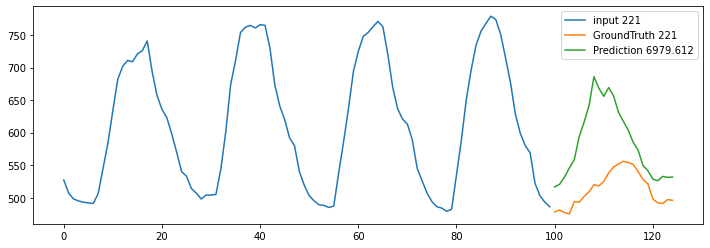

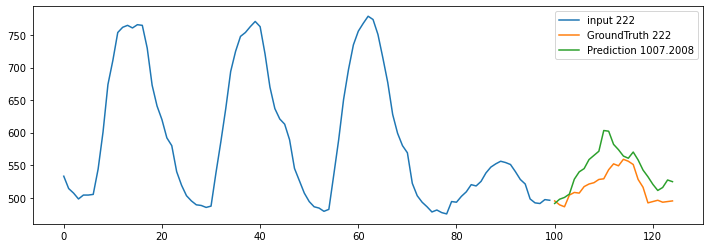

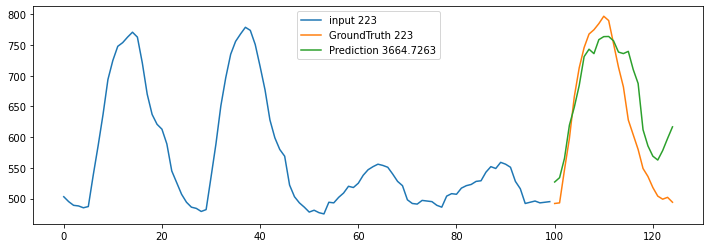

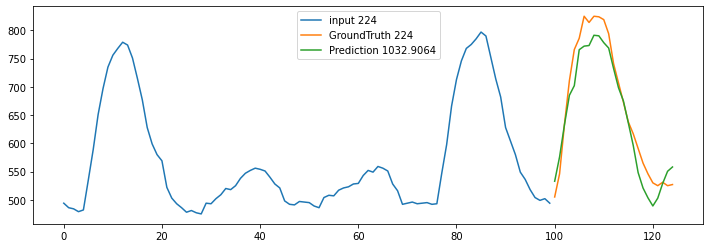

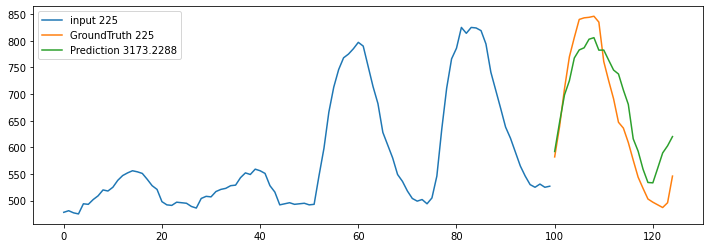

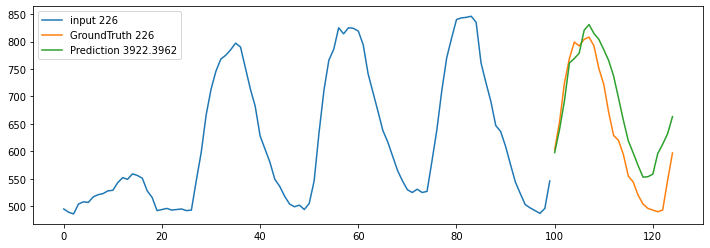

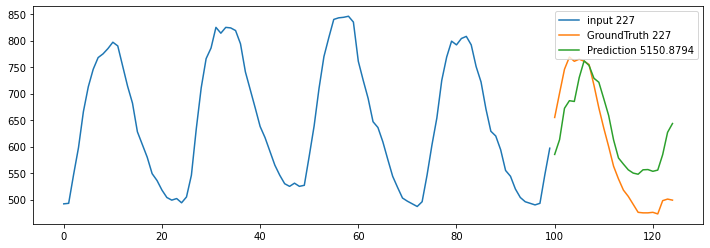

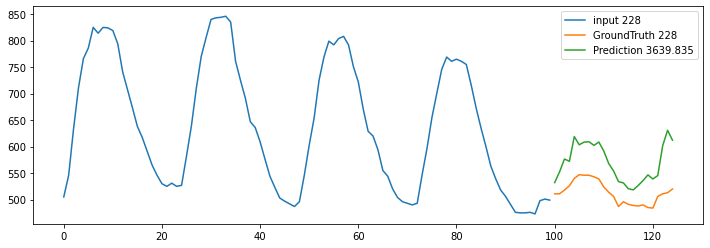

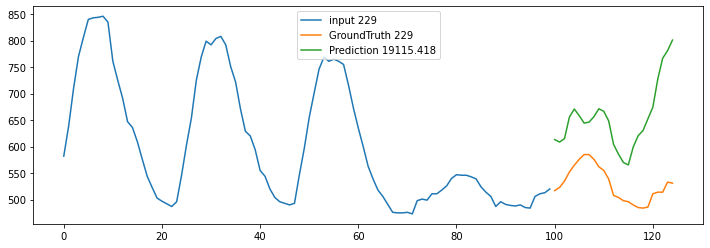

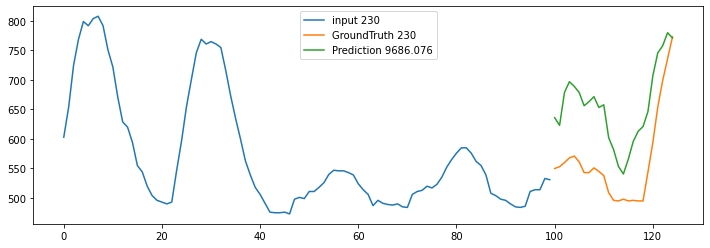

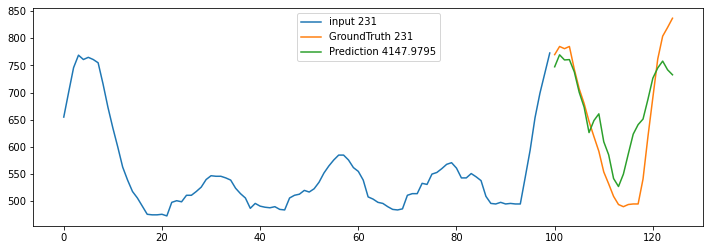

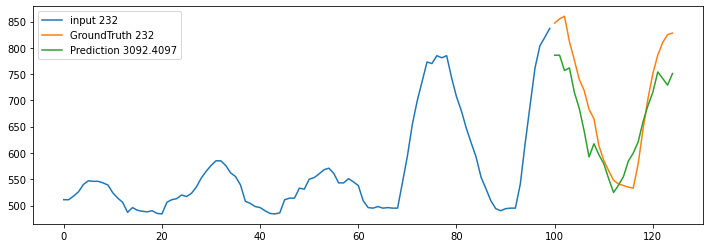

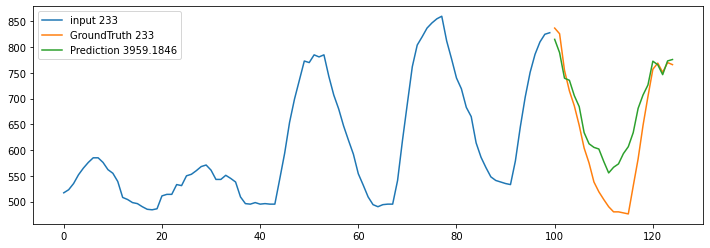

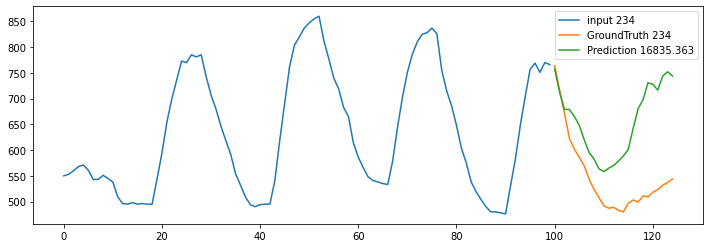

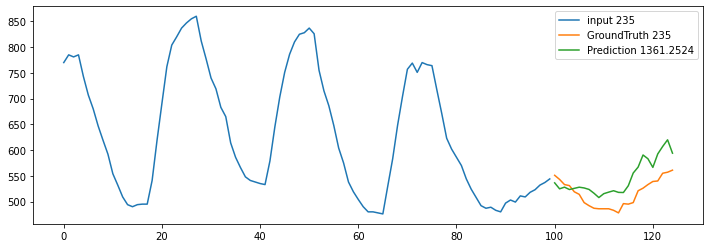

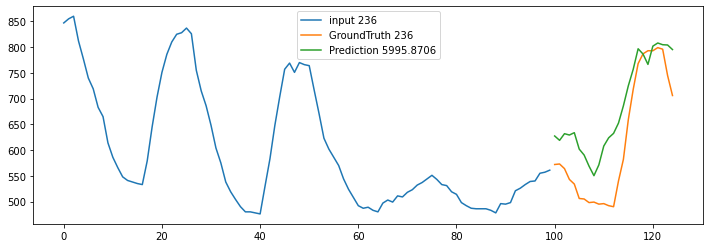

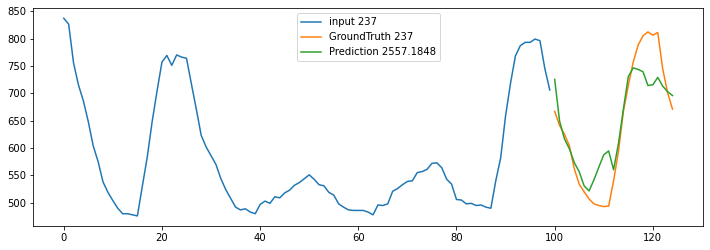

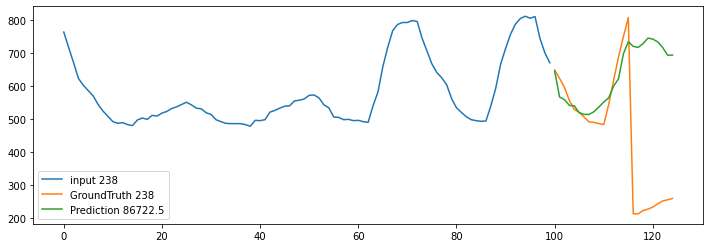

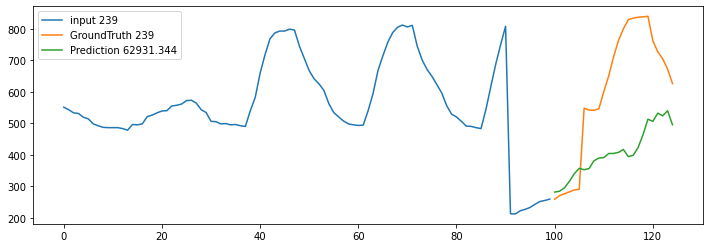

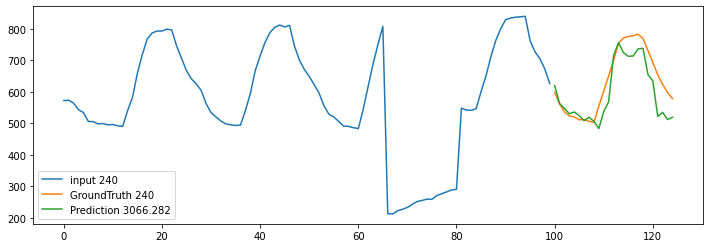

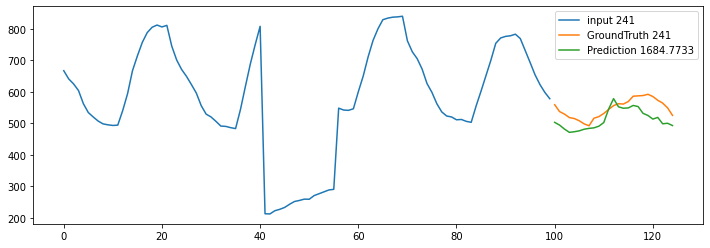

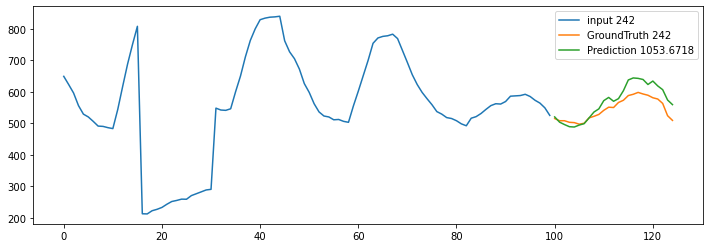

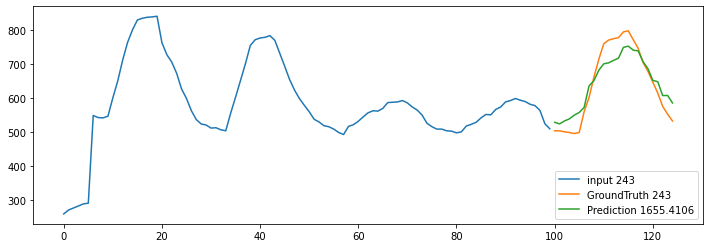

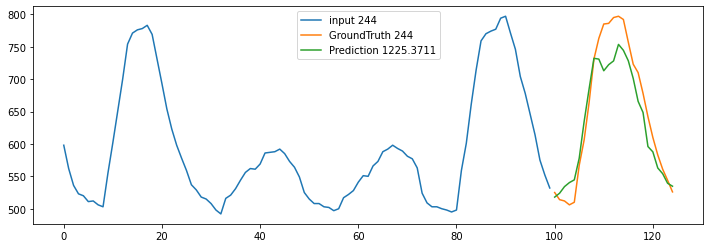

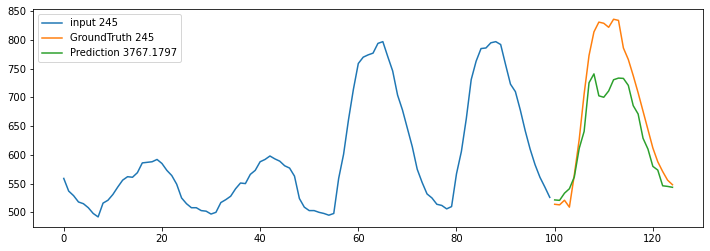

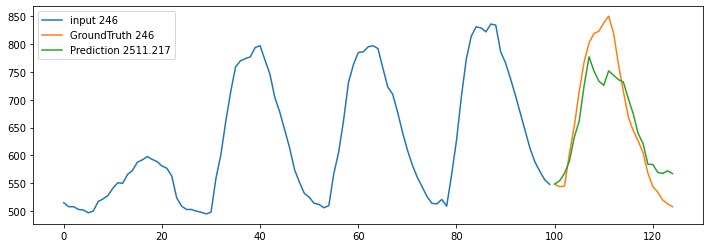

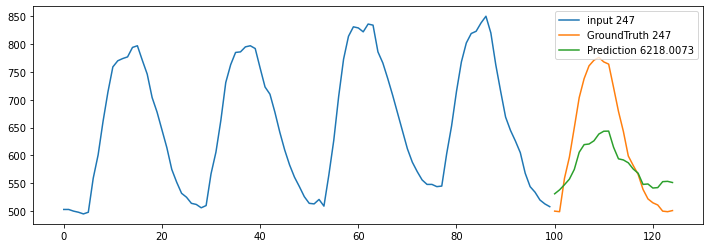

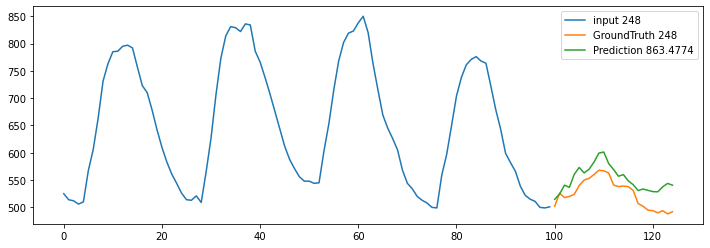

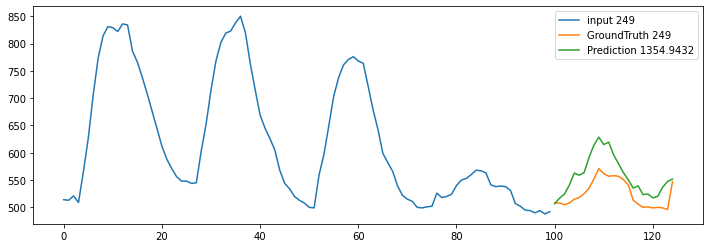

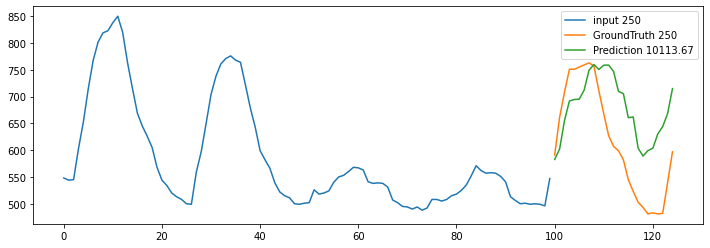

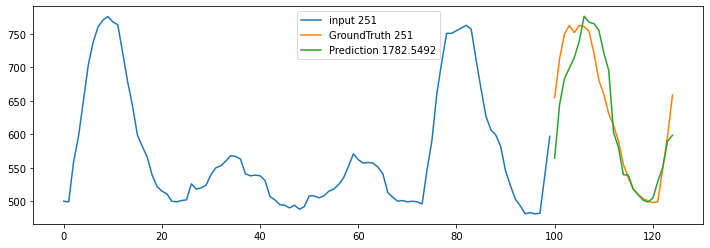

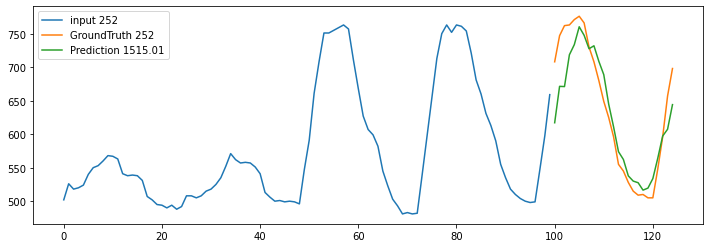

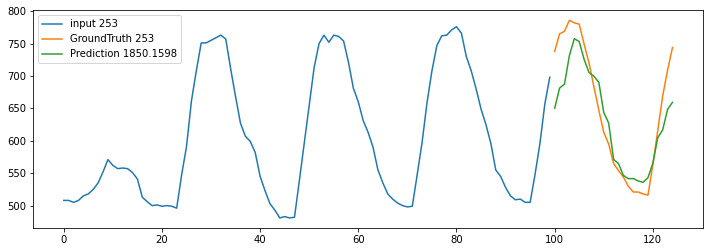

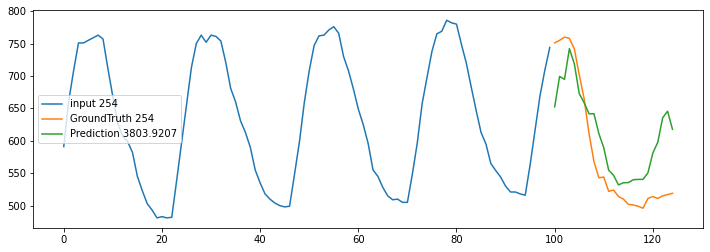

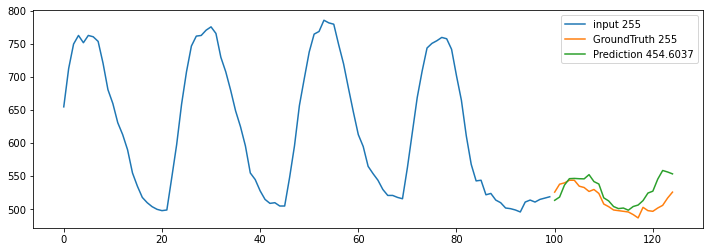

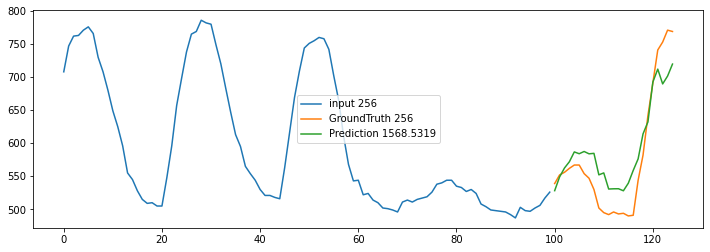

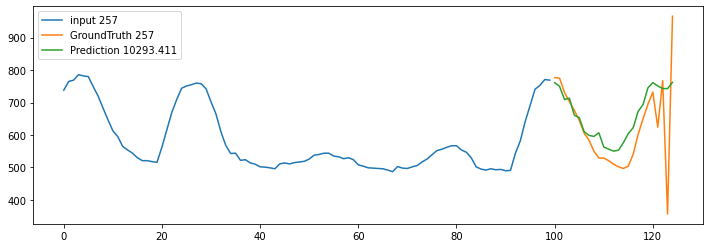

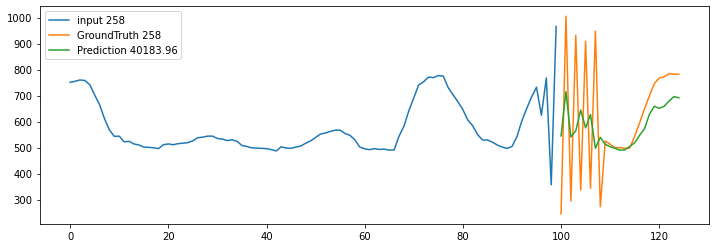

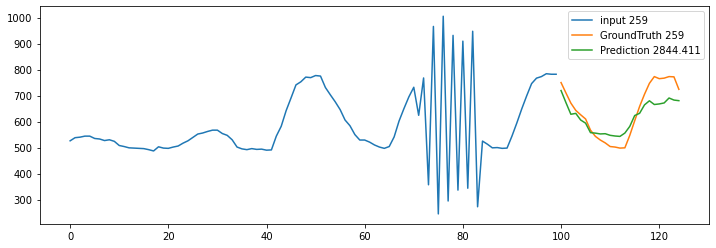

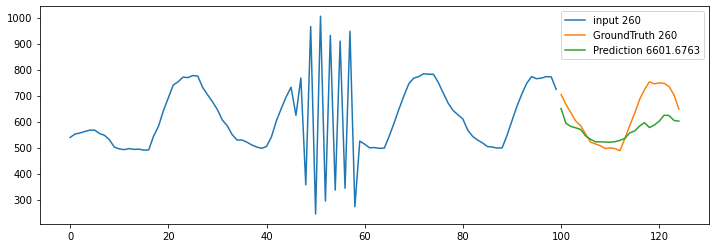

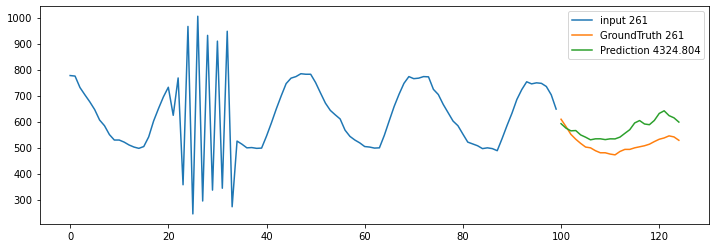

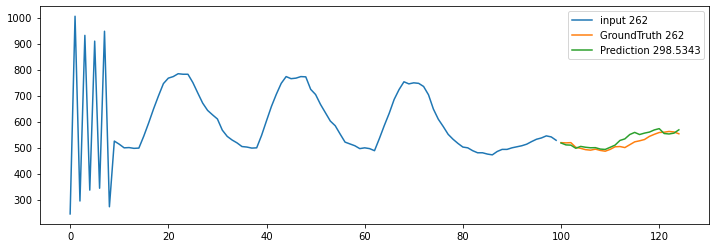

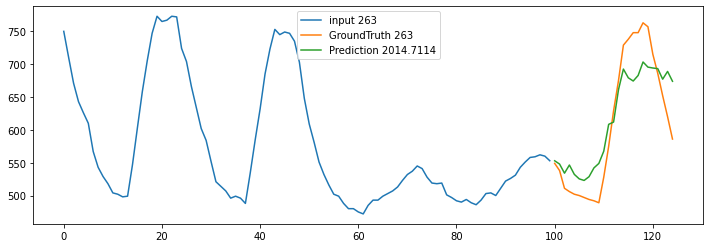

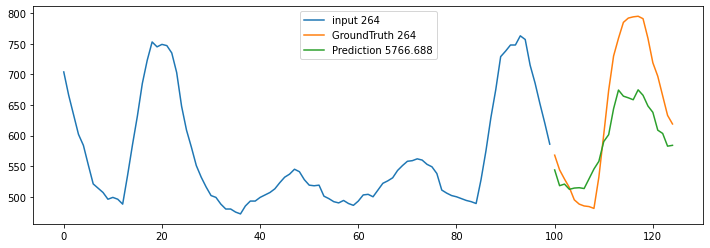

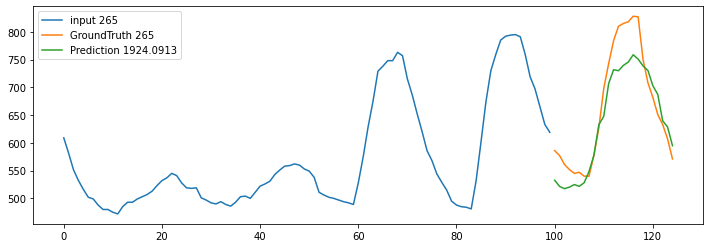

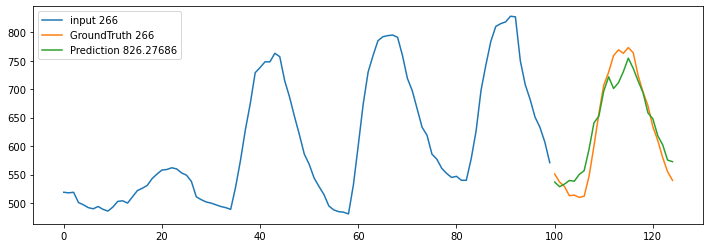

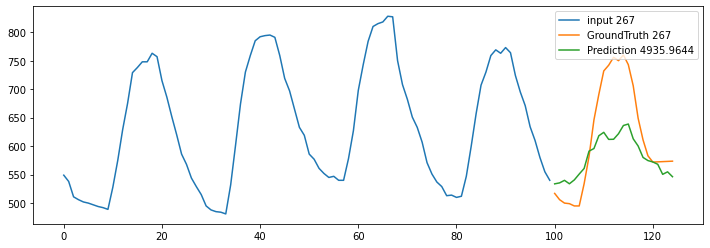

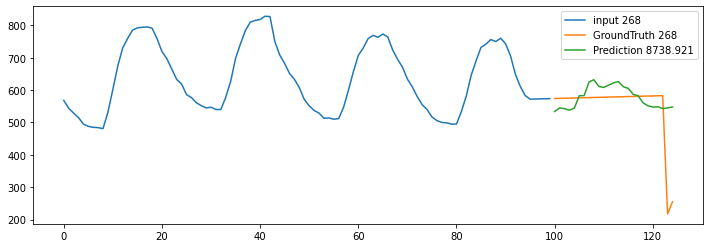

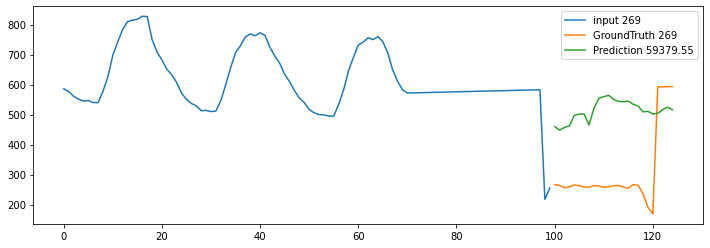

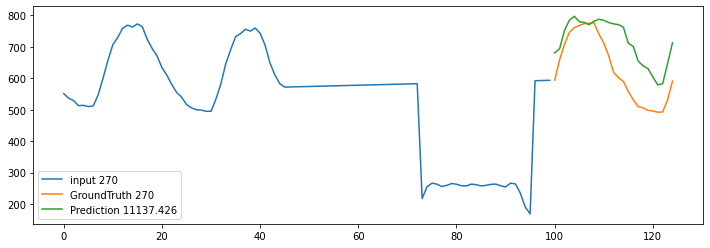

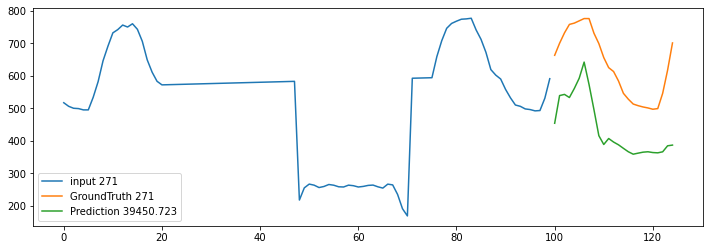

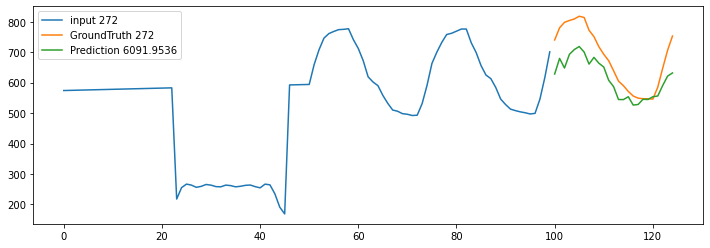

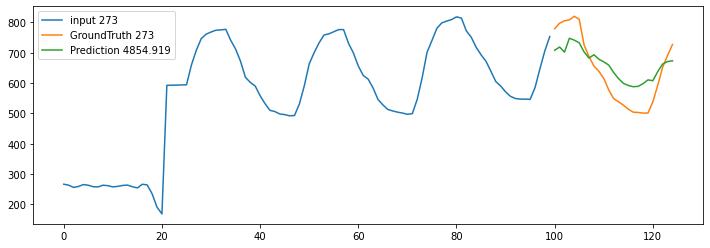

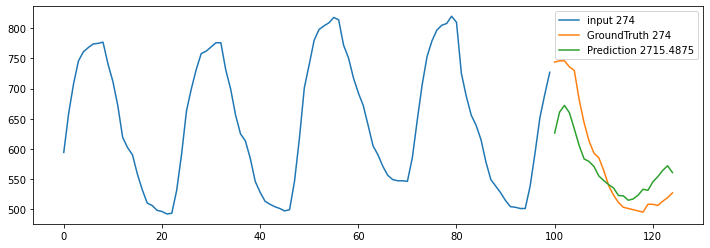

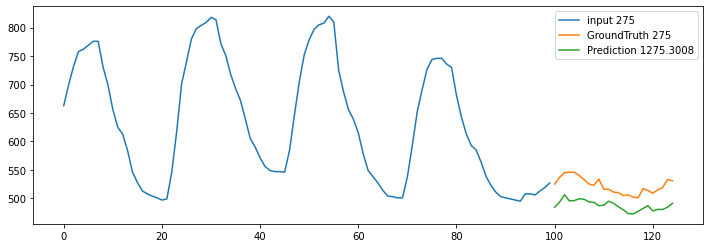

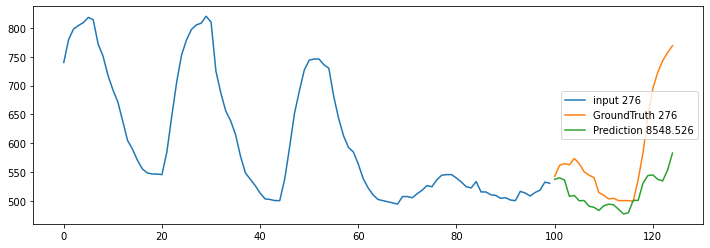

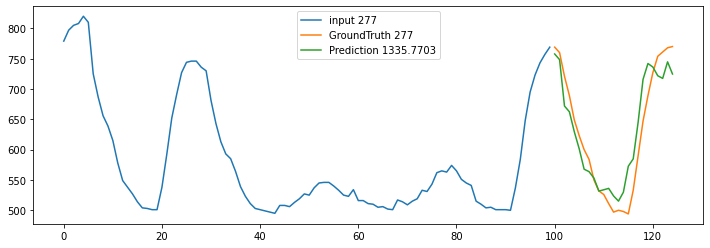

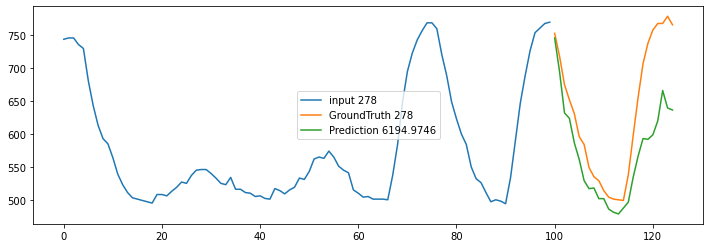

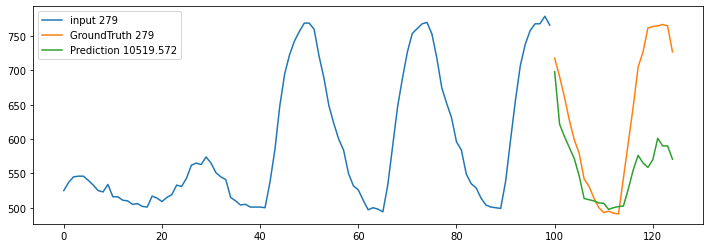

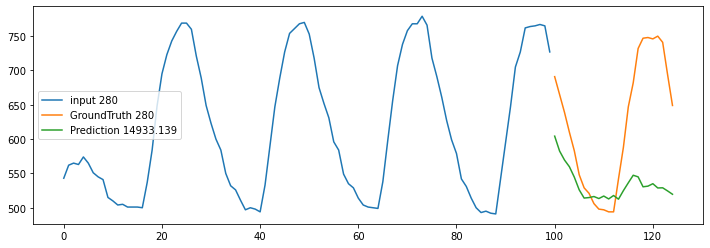

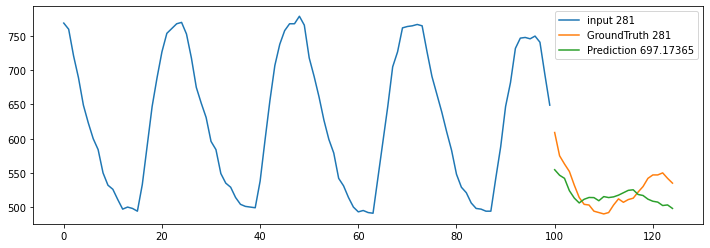

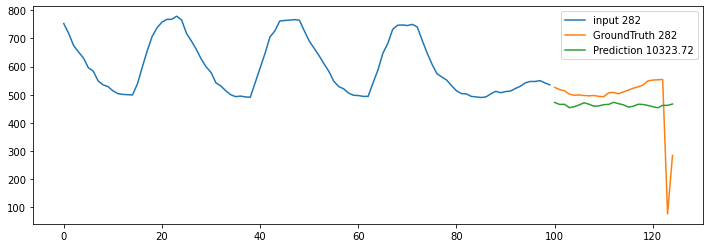

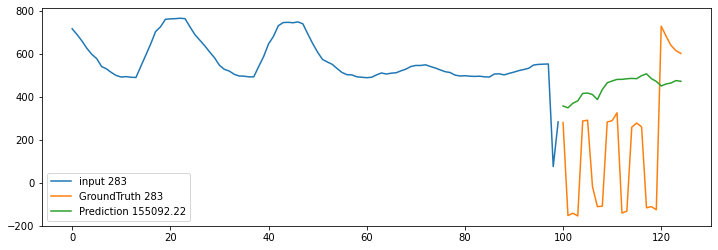

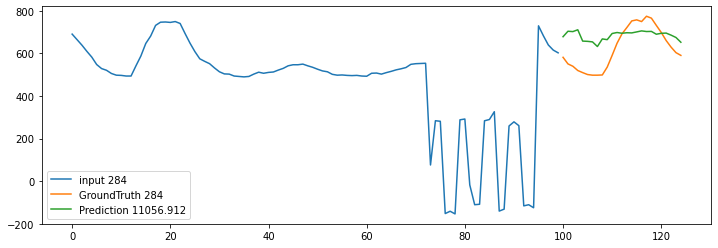

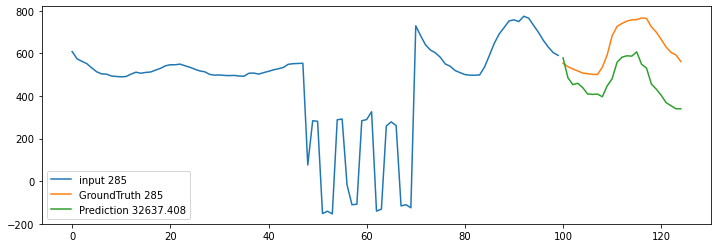

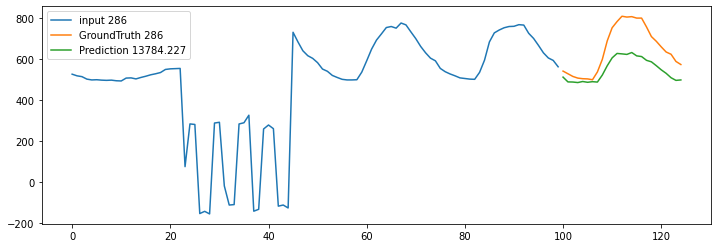

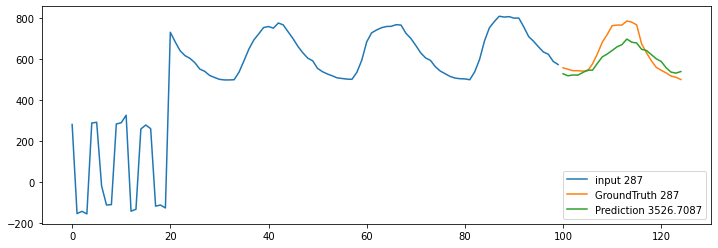

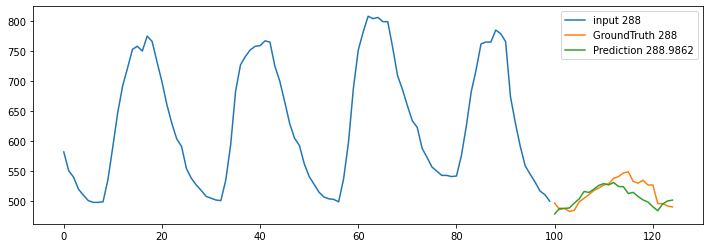

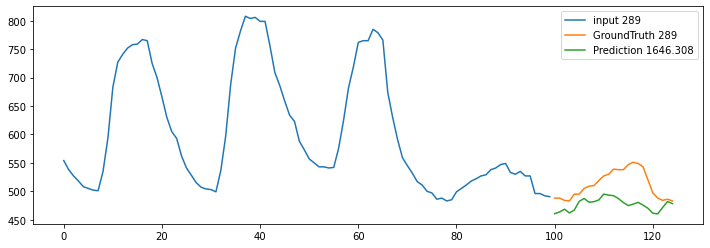

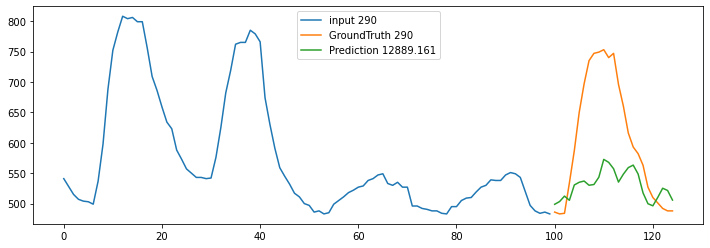

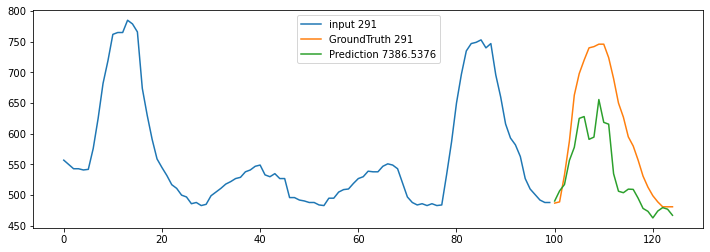

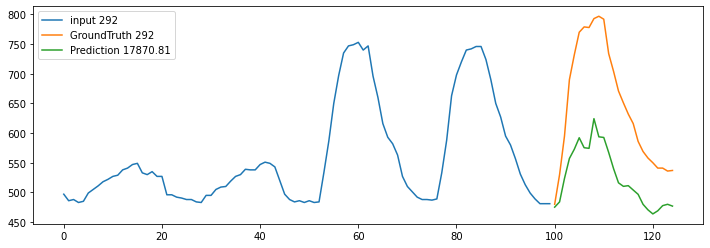

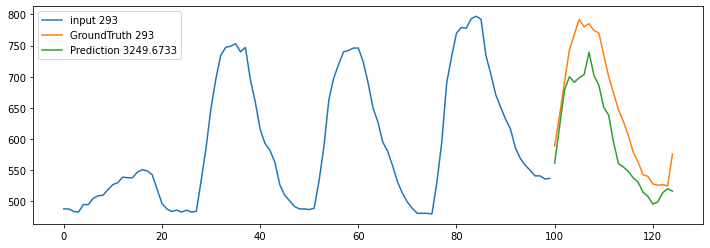

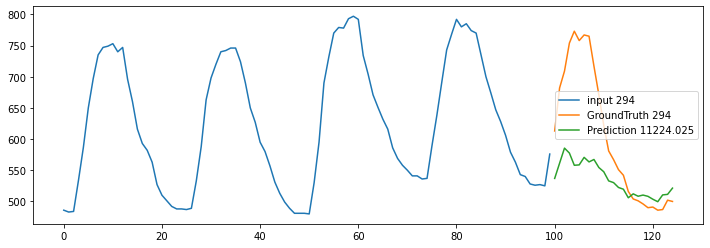

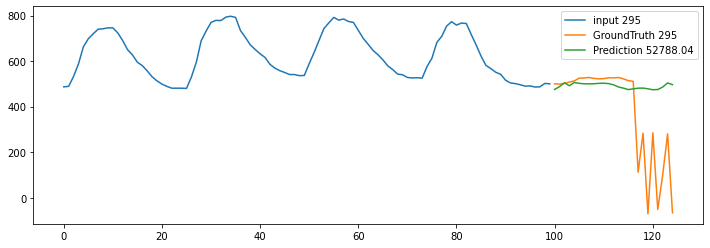

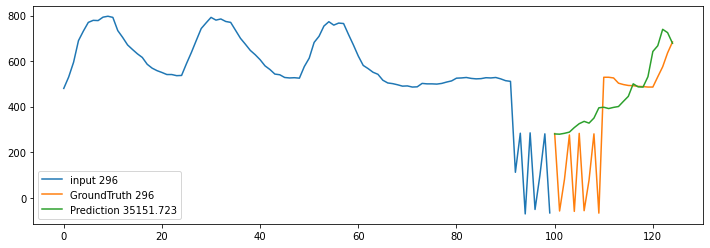

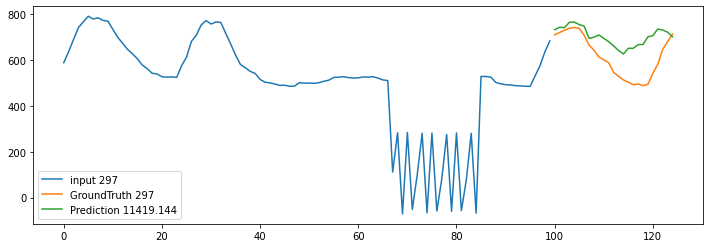

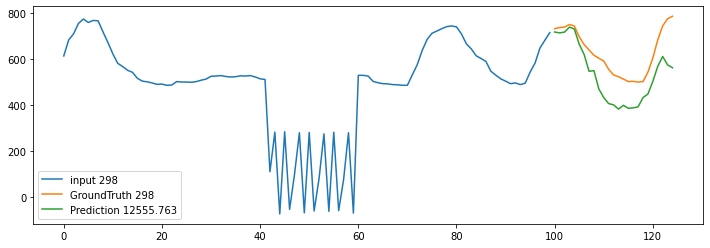

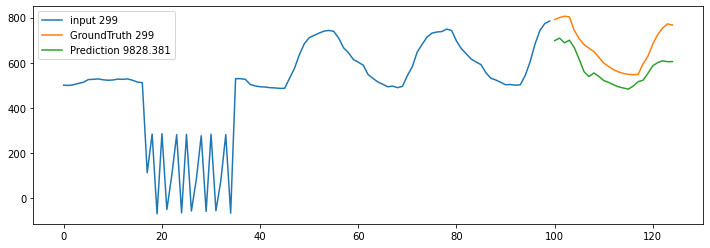

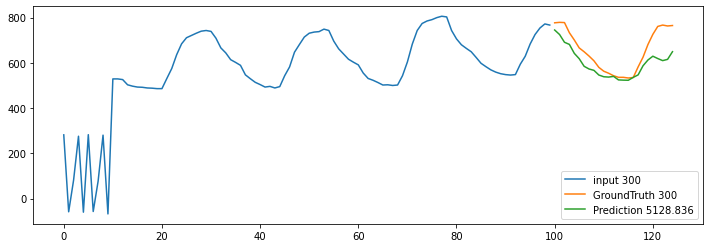

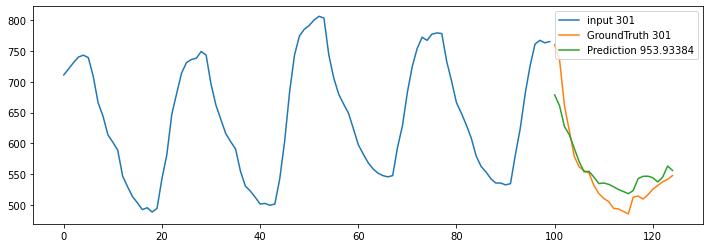

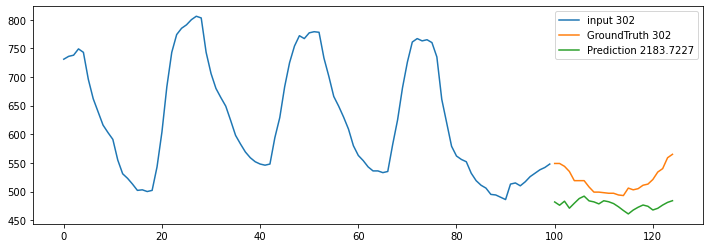

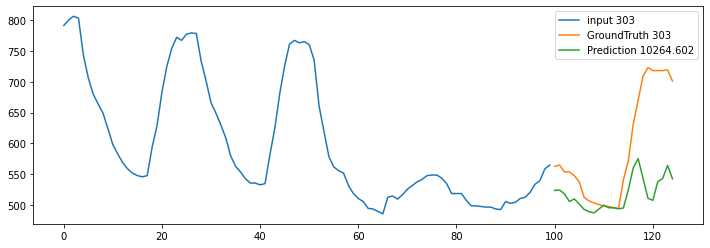

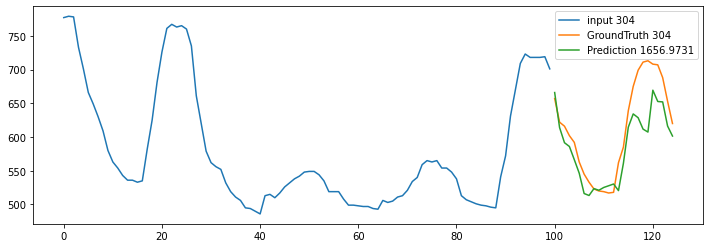

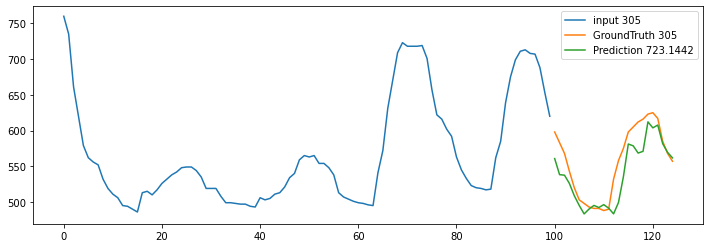

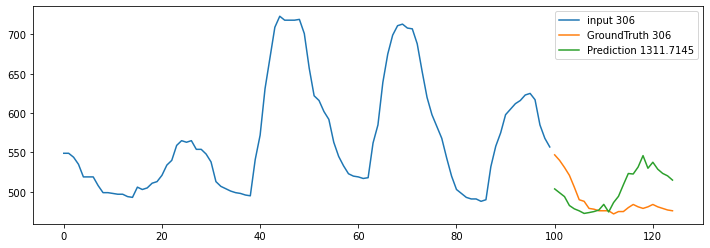

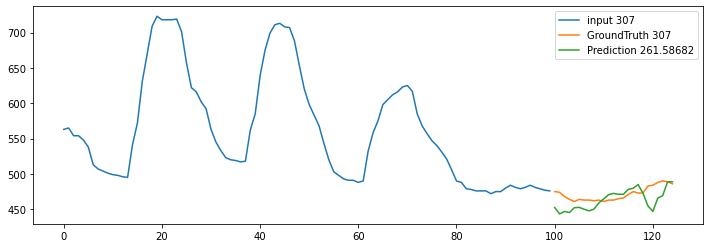

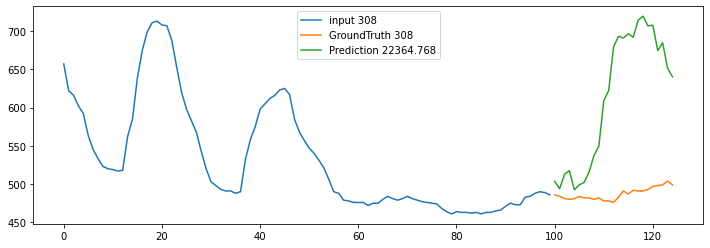

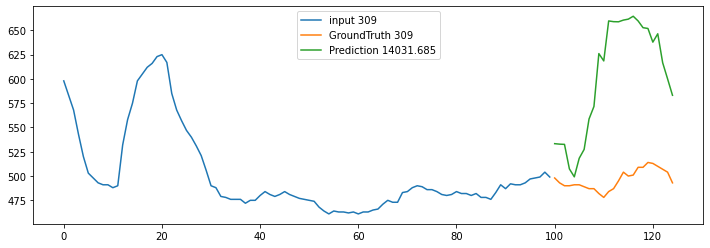

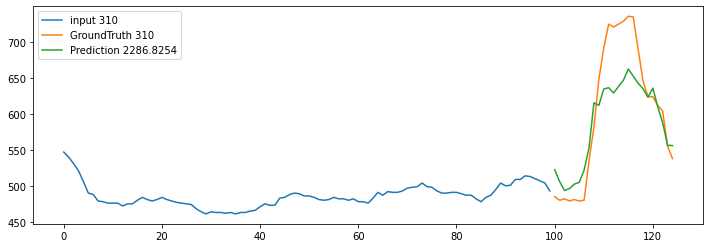

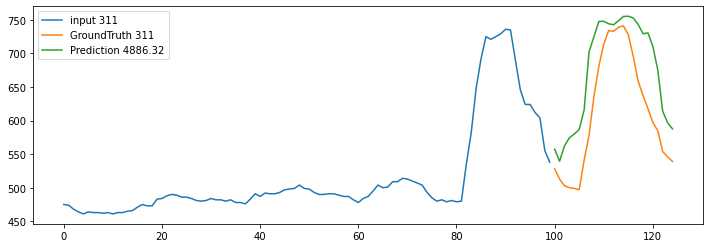

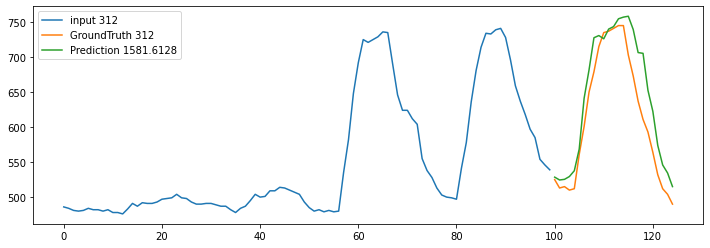

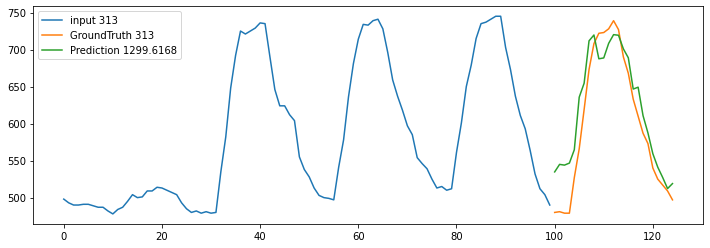

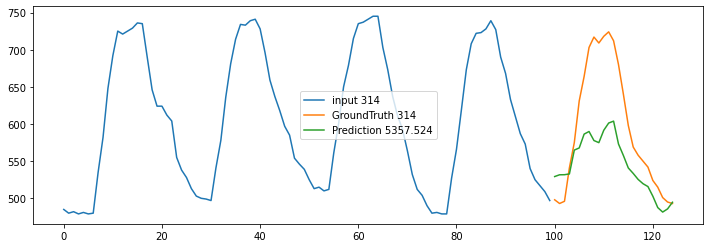

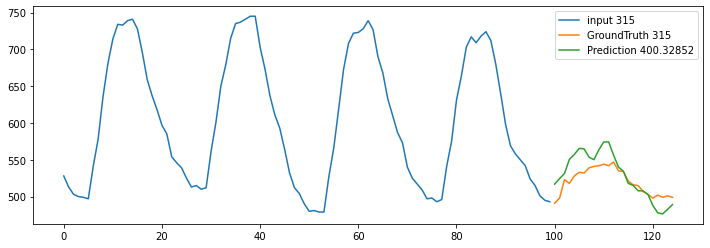

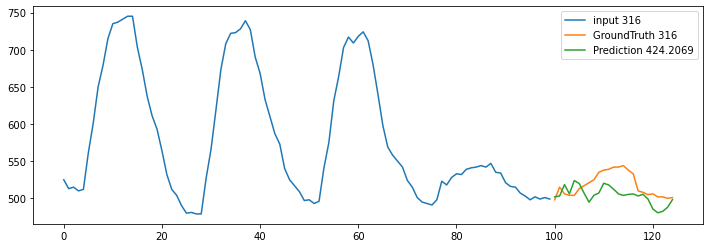

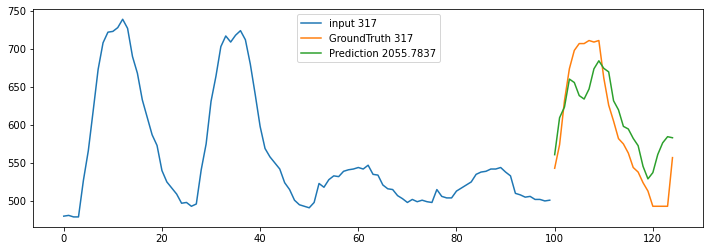

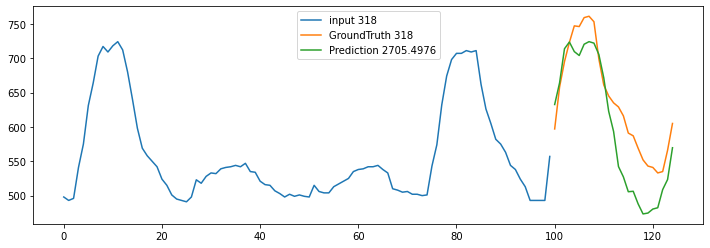

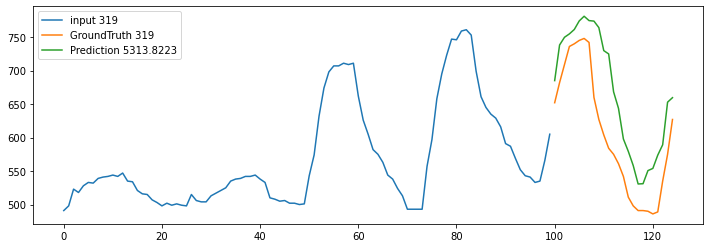

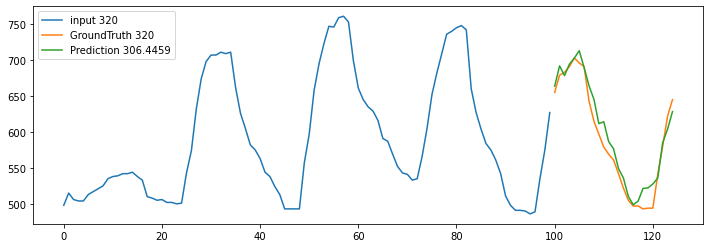

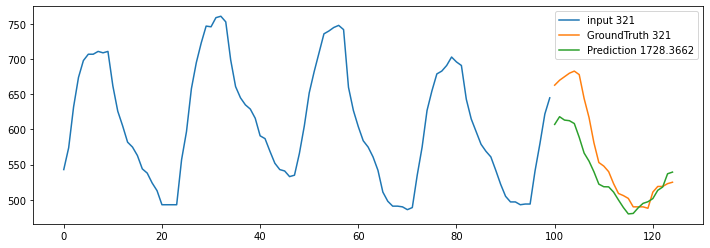

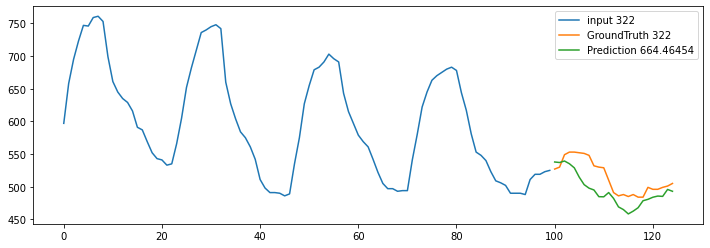

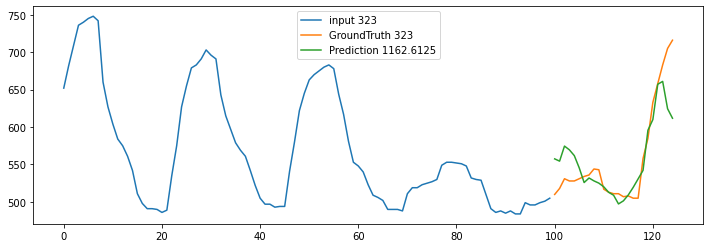

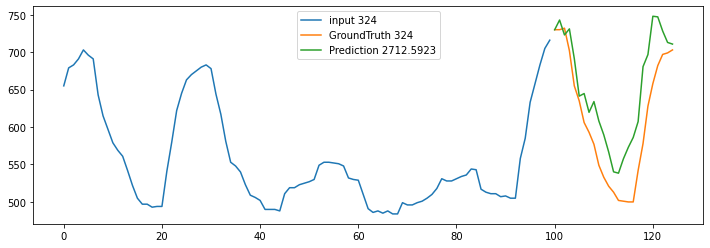

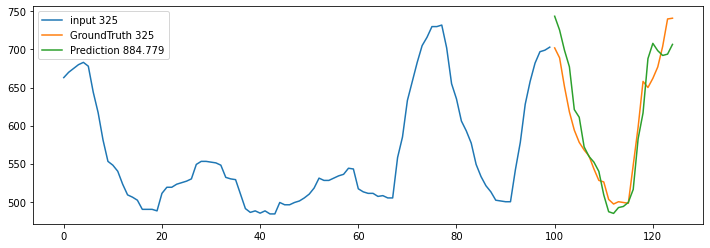

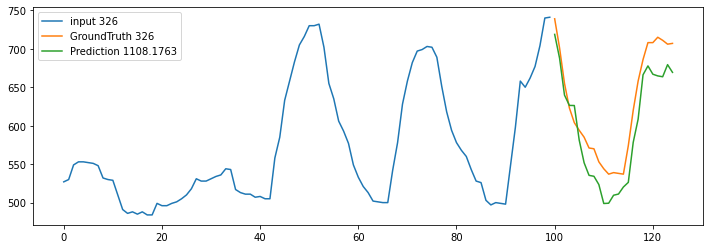

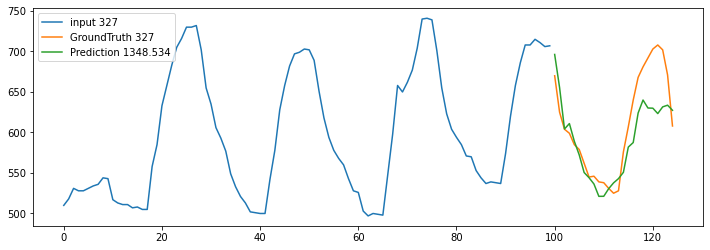

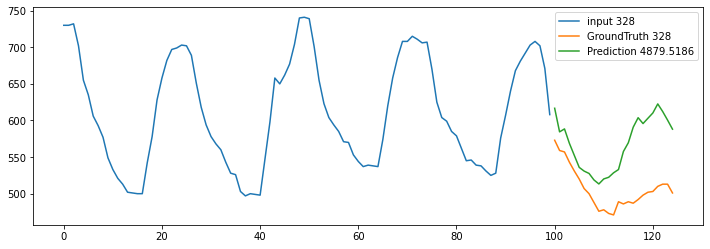

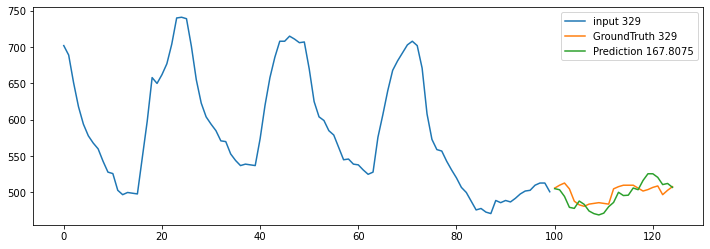

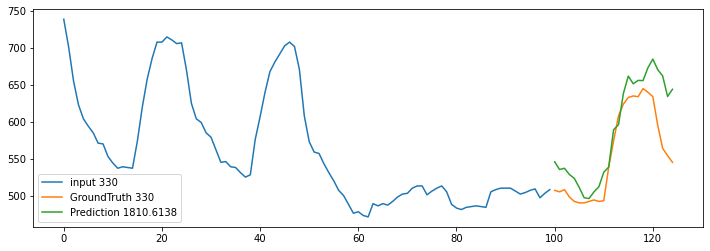

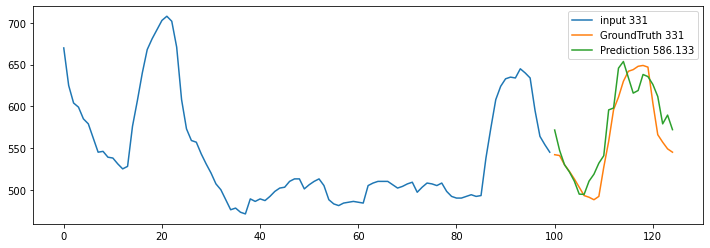

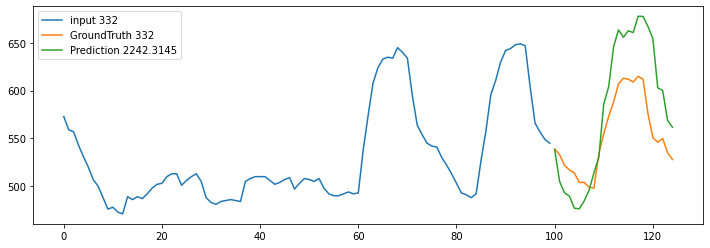

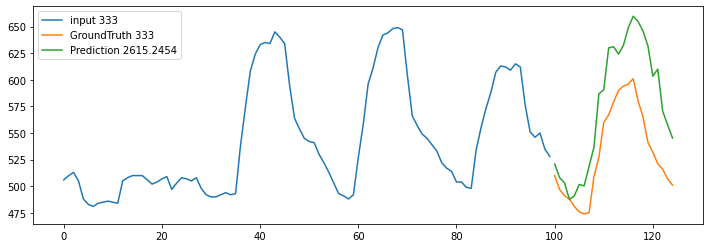

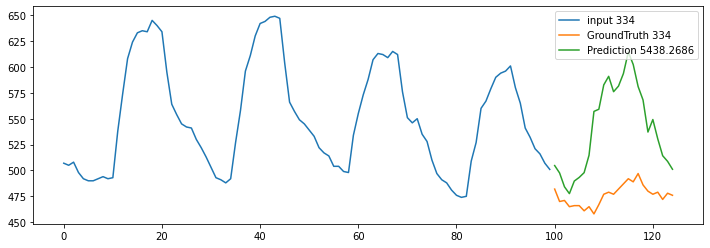

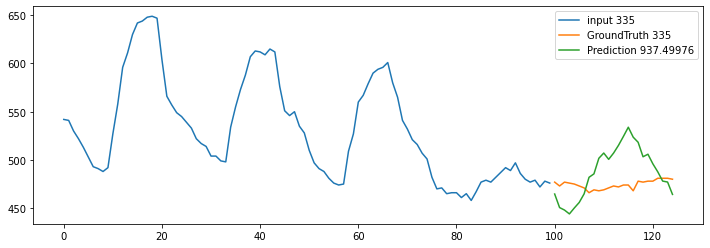

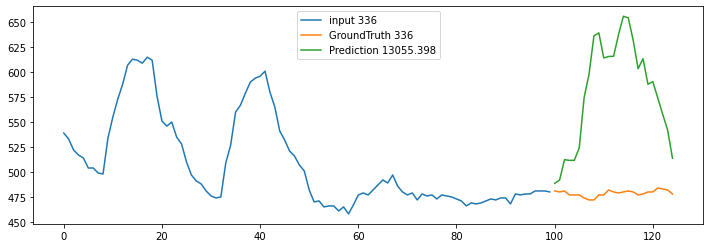

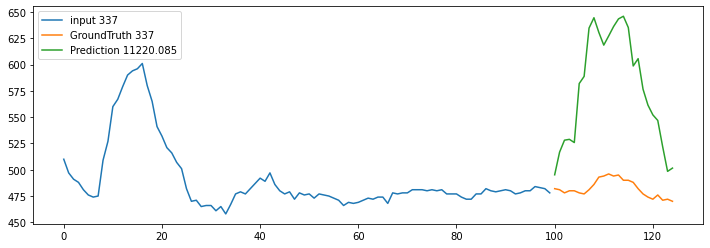

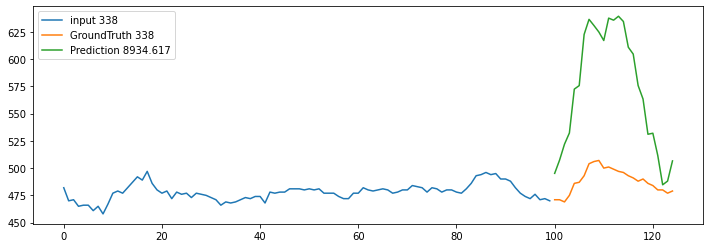

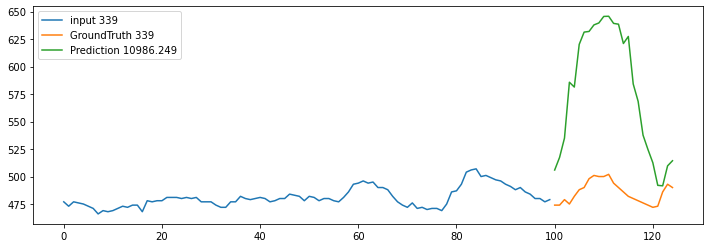

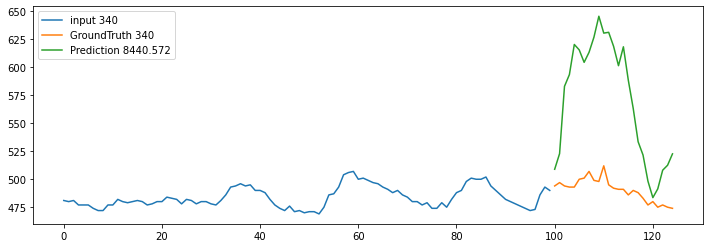

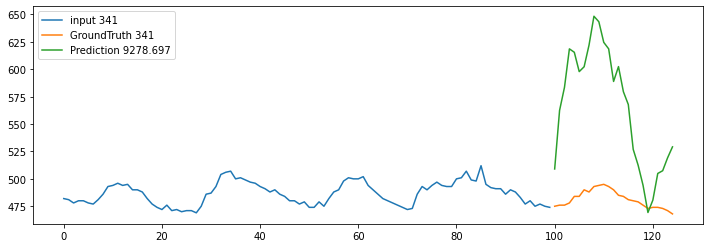

In [32]:
plt.rcParams['figure.figsize'] = (12,4)
x = np.arange(inputs.shape[1]+preds.shape[1])
a = inputs.shape[1]

for i in range(200,342):
    plt.figure()
    c =i 
    plt.plot(x[:a],inputs[c],label='input '+str(c))
    plt.plot(x[a:],trues[c,:,0], label='GroundTruth '+str(c))
    #for i in range(1):

    plt.plot(x[a:],preds[c,:,0], label='Prediction '+str(mean_squared_error(preds[c,:,0],trues[c,:,0])))
    
    plt.legend()
    # fig = plt.figure()
    # plt.savefig("images/trans-mse_test_"+str(i)+".png")
    
    # plt.show()

In [49]:
!python mask_generator.py --dataset_name smd

File saved as /mnt/cat/data/sandy/Forecasting/data/smd/smd_mask_iqr.npy !!
smd_mask_iqr.npy                              100%  185KB   1.1MB/s   00:00    
File saved as sandy@dog.cse.iitb.ac.in:/mnt/a99/d0/sandy/Forecasting/data/smd/smd_mask_iqr.npy !!


In [40]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
path = "Results/electricity_train_m/electricity_ip_100_op_50_test_01/electricity/"
preds = np.load(path+'trans-mse-ar_pred_mu.npy')
inputs = np.load(path+'inputs.npy')
trues = np.load(path+'targets.npy')
new_preds = preds.squeeze()
new_trues = trues.squeeze()
N_input = 336
print(new_preds.shape,new_trues.shape)
n = (N_input-1)//50 + 1
l = new_preds.shape[0]
final = []
for line in range(0,l,n-1):
    chunk = dict()
    chunk['preds'] = new_preds[line:line+n]
    chunk['trues'] = new_trues[line:line+n]
    chunk['mask'] = np.zeros_like(new_trues[line:line+n])
    chunk['mse'] = [mean_squared_error(i,j) for i,j in zip(new_preds[line:line+n],new_trues[line:line+n])]
    final.append(chunk)
mse = [mean_squared_error(i,j) for i,j in zip(new_preds,new_trues)]


for j,line in enumerate(final):
    # print(sorted(line['mse'],reverse=True))
    msep = np.quantile(mse,0.75)+iqr(mse,interpolation='midpoint')*1.5
    if np.max(line['mse'])>msep:
        print(np.argsort(line['mse'])[-1],line['mse']>msep,max(line['mse']))
        for x in range(1,3):
            i = np.argsort(line['mse'])[-x]
            if line['mse'][i]>msep:
                final[j]['mask'][i]= 1
mask = final[0]['mask'].flatten()
for line in final[1:]:
    mask=np.hstack((mask,line['mask'][1:].flatten()))
np.save("mask_electricity_100_op_50.npy",mask)

(909, 50) (909, 50)
5 [False False False False False  True False] 31753.83
4 [False False False False  True  True  True] 1282587.9
0 [ True False False False False False False] 20829.102
3 [False False False  True False False False] 15658.522
4 [False False False False  True False False] 19811.572
4 [False False False False  True False False] 21246.29
1 [False  True  True False False False False] 200745.81
6 [False False False False False False  True] 69576.13
0 [ True False False  True False False False] 69576.13
5 [False False False False False  True False] 18501.656
6 [False False False False False False  True] 15825.582
3 [ True  True False  True False False  True] 21586.08
0 [ True False False False False False False] 16543.75
2 [False False  True False False False False] 15898.488
2 [False False  True False False False False] 273198.88
1 [False  True False False False False False] 15787.68
6 [False False False False False False  True] 37643.12
5 [ True False False False False  Tr

In [5]:
line['mse']

[454.2183, 1465.5262, 5862.1025, 3038.1362, 1613.6603, 4404.3516]

In [6]:
# # create a scaler object
# std_scaler = StandardScaler()
# mse = np.array(mse).reshape(-1,1)
# # fit and transform the data
# mse = std_scaler.fit_transform(mse)
print(np.quantile(mse,0.75)+iqr(mse,interpolation='midpoint')*1.5)
print(np.quantile(mse,0.9))

11904.53726196289
14829.202539062504


In [7]:
# print(len(mask))



In [44]:
mask1 = np.load("mask_electricity_100_op_25.npy")
mask2 = np.load("mask_electricity_100_op_50.npy")
m = trues.reshape(-1,)
print(mask1.shape,mask2.shape,m.shape)
# print(sum(mask)/len(mask))
# data_mask = mask1[25:-25]*mask2
length = min(len(mask1),len(mask2))
print(length)
mask1 = mask1[:length]
mask2 = mask2[:length]


(45475,) (45450,) (45450,)
45450


In [45]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(y = mask1*500,name='mask25'))

fig.add_trace(
    go.Scatter(y = mask2*600,name='mask50'))

fig.add_trace(
    go.Scatter(y= m,name='input'))

fig.show()
